In [1]:
# !pip install plotly
# !pip install -U kaleido

In [25]:
import glob
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from itertools import product

### Plot JUNK

In [15]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(range(data.shape[1]), labels=col_labels,
                  rotation=-30, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

### Everything else

Hi Matthew, I didn't get vary far because I hit some snags:
- For some reason we have zero `False` entries in the accuracies_df for neither the filter_train_set column or the filter_val_set column
    - This is a a problem because we need this info to create a new col for "baseline accuracy", "major accuracy", "minor "accuracy"
    - If we can't get this then we can't make our table 
    - However, if you do find something wrong in my code that is forcing all `False`s to `True` then we can make it
- If we can do that then create a multi-index on the `t_prior` and `e_prior`
    - If you do this I am not entirely sure that you will even need to do the max on the columns because ease multi-index `(t_prior, e_prior)` pair should only have one value for "baseline accuracy", "major accuracy", "minor "accuracy"
- Serioursly let me know if you have questions

In [3]:
# Create the dictionary for the dataframe
files = glob.glob('./grid_search/*.txt')
accuracies_list = []

# Go through all the files
for file in files:
    with open(file) as f:
        data_point = {}
        for line in f:

            # stop if we run into the line that starts the predicted states print
            if '~' not in line:
                if line == '\n':
                    pass
                else:
                    # save the params for this point
                    info = line.strip('\n').split(': ')
                    data_point[f'{info[0]}']= f'{info[1]}'
            else:
                break
        accuracies_list.append(data_point)

In [ ]:
accuracies_df = pd.DataFrame(accuracies_list)
accuracies_df['Accuracy'] = accuracies_df['Accuracy'].astype(float).round(4)
accuracies_df['filter_train_set'].fillna(False, inplace=True)
accuracies_df['filter_val_set'].fillna(False, inplace=True)
accuracies_df['keys'].fillna('All', inplace=True)


new_df = accuracies_df.loc[accuracies_df['keys'].isin(['All', 'major', 'minor'])]
new_df['filter_train_set'].value_counts()

filter_train_set
True     557
False     75
Name: count, dtype: int64

,Accuracy,n_chords,n_melody,t_prior,e_prior,dataset,keys,filter_train_set,filter_val_set
14,0.3470,1,1,30.0,30.0,All,minor,True,True
15,0.3479,1,0,1037.5,1037.5,All,minor,True,True
32,0.3481,1,1,30.0,7.5,All,minor,True,True
35,0.3473,1,0,2025.0,3012.5,All,minor,True,True
137,0.3471,2,1,10.0,2.5,All,minor,True,True


In [ ]:
list(major_df['t_prior'].value_counts().index.astype(float).sort_values().astype(str))


['0.0',
 '2.5',
 '5.0',
 '7.5',
 '10.0',
 '15.0',
 '20.0',
 '22.5',
 '30.0',
 '50.0',
 '90.0',
 '160.0',
 '230.0',
 '300.0',
 '1037.5',
 '2025.0',
 '3012.5',
 '4000.0']

     Accuracy n_chords n_melody t_prior e_prior dataset   keys  \
621    0.3473        2        1     7.5     7.5     All  minor   
813    0.3586        1        1     7.5     7.5     All  minor   

    filter_train_set filter_val_set  
621             True           True  
813             True           True  


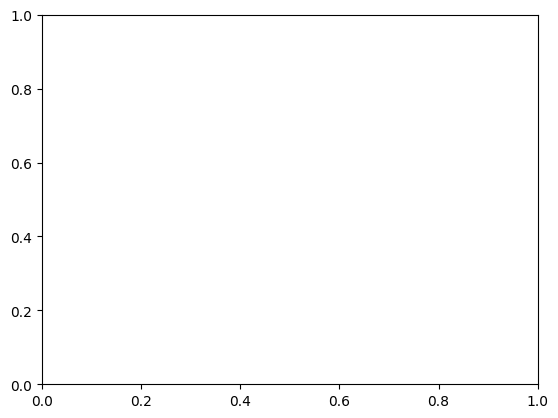

In [ ]:
fig, ax = plt.subplots()
major_df = new_df.loc[accuracies_df['keys']=='minor']

t_prior_labels = list(major_df['t_prior'].value_counts().index.astype(float).sort_values().astype(str))
e_prior_labels = list(major_df['e_prior'].value_counts().index.astype(float).sort_values().astype(str))

major_array = np.zeros((len(t_prior_labels), len(e_prior_labels)))
for (row, t_p), (col, e_p) in product(enumerate(t_prior_labels), enumerate(e_prior_labels)):
    acc = major_df.loc[(major_df['t_prior']==t_p) & (major_df['e_prior']==e_p)]
    if len(acc) > 1:
        print(acc)
    # major_array[]

# im, cbar = heatmap(major_df['Accuracy'], major_df['t_prior'], major_df['e_prior'], ax=ax,
#                    cmap="viridis", cbarlabel="Accuracies")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# fig.tight_layout()
# plt.show()

In [12]:
accuracies_df['filter_train_set'].value_counts()

filter_train_set
True     871
False     75
Name: count, dtype: int64

In [8]:
accuracies_df

,Accuracy,n_chords,n_melody,t_prior,e_prior,dataset,keys,filter_train_set,filter_val_set
0,0.4492,1,0,1037.5,1037.5,NaN,NaN,NaN,NaN
1,0.4471,2,0,20.0,75.0,All,major,True,True
2,0.4351,2,0,230.0,150.0,All,dorian,True,True
3,0.3876,1,1,7.5,7.5,The Session,All,True,True
4,0.4340,1,0,4000.0,3012.5,All,dorian,True,True
...,...,...,...,...,...,...,...,...,...
941,0.4340,1,0,2025.0,4000.0,All,dorian,True,True
942,0.1554,1,0,50.0,3012.5,JSB Chorales,All,True,True
943,0.4310,2,1,10.0,10.0,All,lydian,True,True
944,0.3568,1,1,7.5,15.0,All,minor,True,True


In [22]:
accuracies_df['keys'].value_counts()

keys
All           439
dorian         80
mixolydian     80
lydian         78
phrygian       76
minor          68
major          50
Name: count, dtype: int64

In [18]:
accuracies_df['filter_train_set'].value_counts()

filter_train_set
True    871
Name: count, dtype: int64

In [20]:
accuracies_df['filter_val_set'].value_counts()

filter_val_set
True    871
Name: count, dtype: int64

In [ ]:
fig = px.scatter_3d(accuracies_df, 
              x='n_chords', 
              y='n_melody', 
              z='Accuracy',
              height=800,)
fig.update_xaxes(type='category')
fig.update_yaxes(type='category')
fig.show()

In [6]:
t_prior_labels = accuracies_df['t_prior'].astype(float).value_counts().sort_index().astype(str).index.astype(str).to_list()
e_prior_labels = accuracies_df['e_prior'].astype(float).value_counts().sort_index().astype(str).index.astype(str).to_list()
print(t_prior_labels)
print(type(t_prior_labels[0]))
print(e_prior_labels)
print(type(e_prior_labels[0]))

['0.0', '7.5', '15.0', '20.0', '22.5', '30.0', '50.0', '90.0', '160.0', '230.0', '300.0', '1037.5', '2025.0', '3012.5', '4000.0']
<class 'str'>
['0.0', '7.5', '15.0', '22.5', '30.0', '50.0', '75.0', '150.0', '225.0', '300.0', '1037.5', '2025.0', '3012.5', '4000.0']
<class 'str'>


In [ ]:
px.scatter_3d(accuracies_df, 
              x='t_prior', 
              y='e_prior', 
              z='Accuracy',
              hover_name='Accuracy',
              hover_data=['t_prior', 
                          'e_prior', 
                          'n_chords',
                          'n_melody'],
              category_orders={'t_prior': t_prior_labels,
                               'e_prior':e_prior_labels},
              height=800)

In [75]:
px.scatter_3d(accuracies_df[accuracies_df['Accuracy']>0.32], 
              x='t_prior', 
              y='e_prior', 
              z='Accuracy',
              hover_name='Accuracy',
              hover_data=['t_prior', 
                          'e_prior', 
                          'n_chords',
                          'n_melody'],
              category_orders={'t_prior': t_prior_labels,
                'e_prior':e_prior_labels},
              height=800)

In [15]:
fig = px.scatter(accuracies_df[accuracies_df['Accuracy']>0.32], 
              x='t_prior',  
              y='Accuracy',
              hover_name='Accuracy',
              color='e_prior',
              symbol='e_prior',
              size_max=15,
              symbol_sequence=['circle', 'triangle-up', 'star-triangle-up', 'square',
                               'star-square', 'diamond', 'diamond-tall', 'star-diamond', 
                               'pentagon', 'hexagon', 'octagon', 'cross',
                               'star', 'hexagram'],
              hover_data=['t_prior', 
                          'e_prior', 
                          'n_chords',
                          'n_melody'],
              category_orders={'t_prior': t_prior_labels,
                'e_prior':e_prior_labels},
              height=800,
              width=1200)
fig.update_traces(marker={'size': 10})
pio.write_image(fig, "first_grid_search.pdf", height=800, width=1000)

In [ ]:
px.scatter(accuracies_df[accuracies_df['Accuracy']>0.32], 
              x='t_prior',  
              y='Accuracy',
              hover_name='Accuracy',
              color='e_prior',
              hover_data=['t_prior', 
                          'e_prior', 
                          'n_chords',
                          'n_melody'],
              category_orders={'t_prior': t_prior_labels,
                'e_prior':e_prior_labels},
              height=800)

major
minor
highest overall (not on subsetted dataset)

In [72]:
accuracies_df.loc[accuracies_df['Accuracy'].idxmax()]

Accuracy    0.4597
n_chords         1
n_melody         0
t_prior     3012.5
e_prior       50.0
Name: 53, dtype: object

In [ ]:
print(accuracies_df['Accuracy'].max().round(2))
print(np.floor(accuracies_df['Accuracy'].min()))

0.46
0.0


In [101]:
percs = list(range(int(np.floor(accuracies_df['Accuracy'].min())),
           int(accuracies_df['Accuracy'].max().round(2)*100),
           1
           )
    )
total_len = len(accuracies_df)

previous_perc_above = -1
print('Grid Search Accuracies')
print('---------------------')
for perc in percs[::-1]:
    perc = perc/100.0
    # print(perc)
    perc_len = len(accuracies_df[accuracies_df['Accuracy'] >= perc])
    perc_above = round(perc_len/total_len, 3)

    if perc_above != previous_perc_above:
        print(f"% of grid points >= ({perc:.2f}):\t {round(perc_above, 3)}")
        previous_perc_above = perc_above


Grid Search Accuracies
---------------------
% of grid points >= (0.45):	 0.147
% of grid points >= (0.44):	 0.36
% of grid points >= (0.43):	 0.6
% of grid points >= (0.42):	 0.787
% of grid points >= (0.41):	 0.907
% of grid points >= (0.38):	 0.92
% of grid points >= (0.31):	 0.933
% of grid points >= (0.01):	 0.987
% of grid points >= (0.00):	 1.0
